# Applied Survival Analysis Using R 
### Book by Dirk F. Moore

## 3. Nonparametric Survival Curve Estimation

* Note : This note book is created with R in Jupyter Notebook.
* Note : I made this note book by coping graphs of the book. Additional R code in addition to the book is added if necessary.  For detail explanation, refer the book. 

In [2]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 

## 3.1 Nonparametric Estimation of the Survival Function

We have seen there are a variety of hazard function. But which parametric model should be used in our study? It is hard to know what parametric family to choose. Thus, in medical and health applications, __nonparametric method__ have considerable advantages. The most widly used of these is the __Kaplan-Meier estimator__.

<font size="3"> __Fig. 3.2__ Kaplan-Maier survival curve estimate with 95% confidence intervals </font>

we use the data Table1.1 to estimate the Kaplan-Meier estimator.

In [3]:
library(survival)

In [4]:
tt <- c(7,6,6,5,2,4)
cens <-c(0,1,0,0,1,1)
Surv(tt, cens)

[1] 7+ 6  6+ 5+ 2  4 

In [5]:
result.km <- survfit(Surv(tt, cens) ~ 1 , conf.type='log-log')

* Compute confidence interval based on the complementary log-log transformation.
* log-log transformation method is preffered since delta-method is based on the variance and the variance may extend above one or below 0.

In [6]:
result.km

Call: survfit(formula = Surv(tt, cens) ~ 1, conf.type = "log-log")

     n events median 0.95LCL 0.95UCL
[1,] 6      3      6       2      NA

Output interpretation

* n: the number of records
* events: the number of events ( three deaths)
* median: the median survival time
* 0.95LCL: Lower 95% confidence limit
* 0.95UCL: Upper 95% confidence limit, In this example, 0.95UCL is undefined.

In [7]:
summary(result.km)

Call: survfit(formula = Surv(tt, cens) ~ 1, conf.type = "log-log")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    2      6       1    0.833   0.152       0.2731        0.975
    4      5       1    0.667   0.192       0.1946        0.904
    6      3       1    0.444   0.222       0.0662        0.785

This lists the distinct failure times(2, 4, and 6 years). The number at risk at each time interval, and the number of events at each failure time.

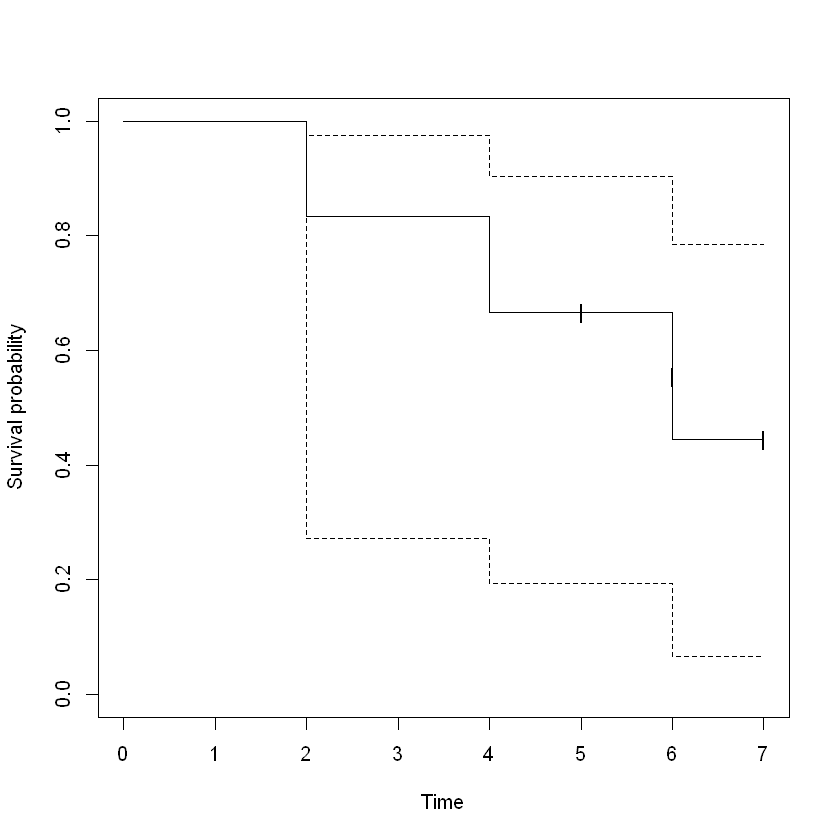

In [8]:
plot(result.km, ylab='Survival probability', xlab='Time',  mark.time=TRUE, mark="|")

<font size="3"> __Table 3.2__ Nelson-Aalen estimate of the survival funcion </font>

An alternative estimator of the survival function is the _Nelson-Aalen_ estimator. In R, type "type='ft"

In [9]:
result.fh <- survfit(Surv(tt, cens) ~ 1 , conf.type='log-log', type='fh')

In [10]:
summary(result.fh)

Call: survfit(formula = Surv(tt, cens) ~ 1, conf.type = "log-log", 
    type = "fh")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    2      6       1    0.846   0.141        0.306        0.977
    4      5       1    0.693   0.180        0.229        0.913
    6      3       1    0.497   0.210        0.101        0.807

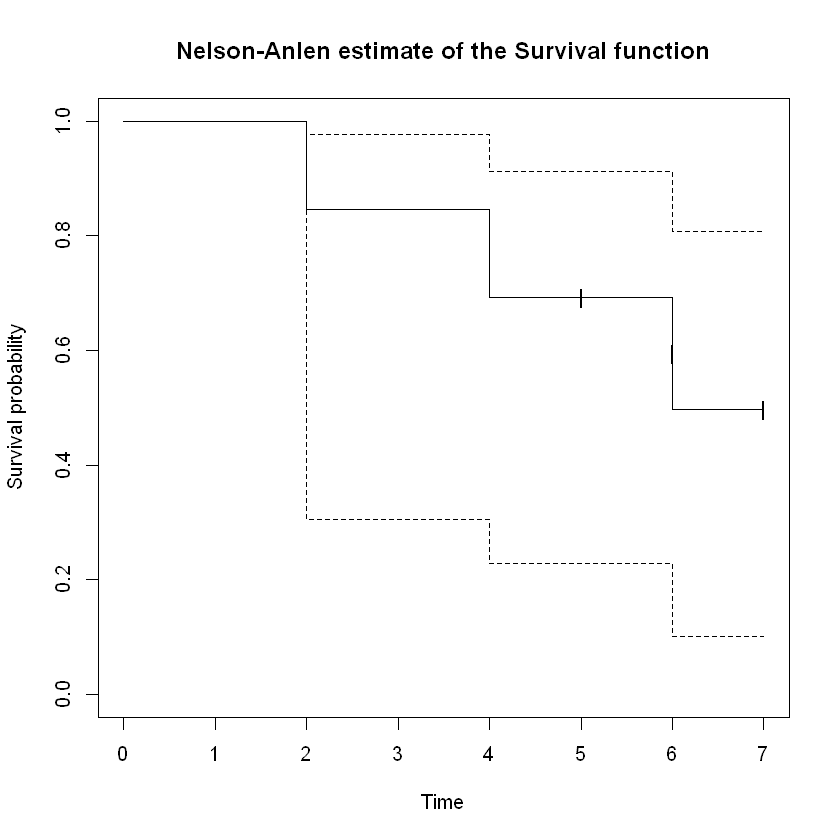

In [11]:
plot(result.fh, ylab='Survival probability', xlab='Time',  mark.time=TRUE, mark='|', main='Nelson-Anlen estimate of the Survival function')

<font size="3"> __Fig. 3.3__ Progression-free survival of gastric canter patients treated with Xelox </font>

We now consider data from an actual clinical trial. The data set “gastricXelox”
is a Phase II (single sample) clinical trial of the chemotherapeutic agent Xelox
administered to patients with advanced gastric cancer prior to surgery (Wang
et al. [74]).

In [12]:
install.packages('asaur')

package 'asaur' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\shims\AppData\Local\Temp\RtmpmmbXbi\downloaded_packages


In [13]:
library(asaur)

In [14]:
timeMonths <- gastricXelox$timeWeeks*7/30.25
delta <- gastricXelox$delta

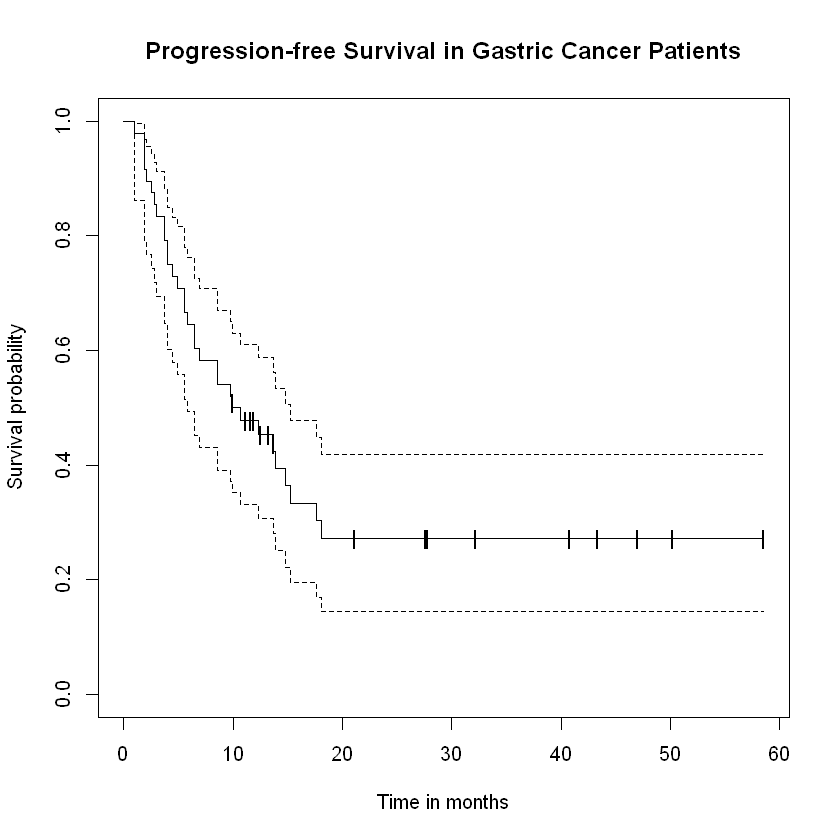

In [15]:
result.km <- survfit(Surv(timeMonths, delta) ~ 1, conf.type="log-log")
plot(result.km, conf.int=T, mark="|", xlab="Time in months", ylab="Survival probability")
title("Progression-free Survival in Gastric Cancer Patients")

## 3.2 Finding the Median Survival and a Confidence Interval for the Median

<font size="3"> __Fig. 3.4__ The median is indicated by the vertical green line at 10.3 months, which intersects the survival curve estimate at 0.5. The 95 % confidence interval is indicated by the vertical blue lines
at 5.79 and 10.27; they intersect the lower and upper survival curve confidence limits at 0.5 </font>

From the "gastricXelox"

In [28]:
result.km

Call: survfit(formula = Surv(timeMonths, delta) ~ 1, conf.type = "log-log")

      n events median 0.95LCL 0.95UCL
[1,] 48     32   10.3    5.79    15.3

In [ ]:
library('survminer')

In [65]:
# extract information median, lower, upper value of the model output
median <- survminer::surv_median(result.km)[2]
lower <- survminer::surv_median(result.km)[3]
upper <- survminer::surv_median(result.km)[4]

median[1,1]
lower[1,1]
upper[1,1]

[1] 10.29752

[1] 5.785124

[1] 15.27273

In [57]:
class(lower)

[1] "data.frame"

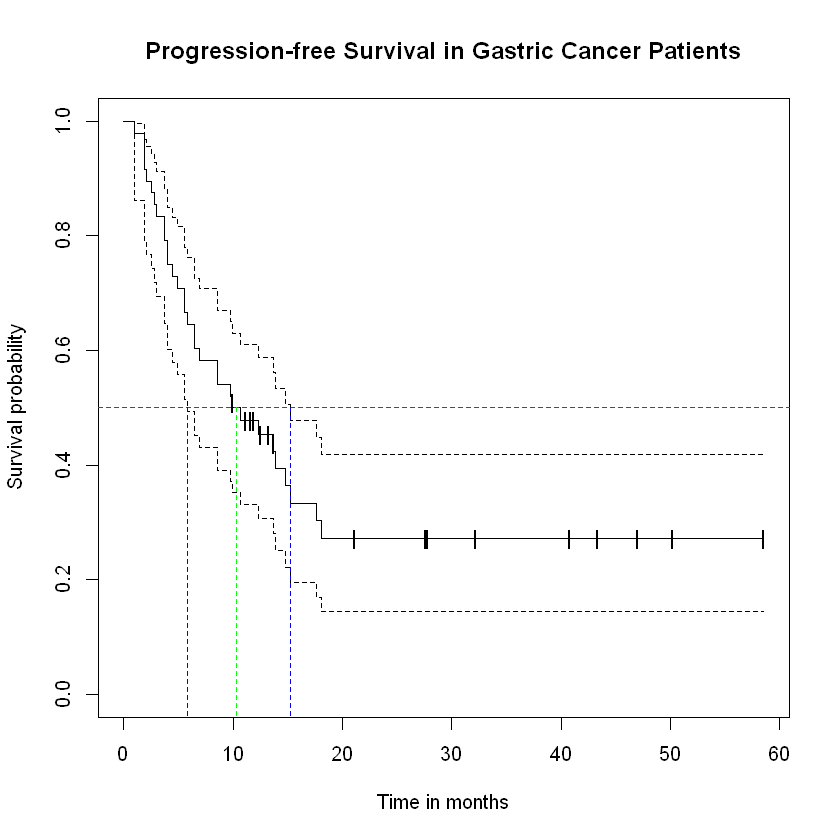

In [64]:
result.km <- survfit(Surv(timeMonths, delta) ~ 1, conf.type="log-log")
plot(result.km, conf.int=T, mark="|", xlab="Time in months", ylab="Survival probability")
title("Progression-free Survival in Gastric Cancer Patients")


#abline segment
abline(h=0.5, lty=2, col='red') # Survival probability=0.5

segments(x0=lower[1,1], y0= -1, x1=lower[1,1], y1=0.5, lty=2, col="blue")
segments(x0=median[1,1], y0= -1, x1=median[1,1], y1=0.5, lty=2, col="green")
segments(x0=upper[1,1], y0= -1, x1=upper[1,1], y1=0.5, lty=2, col="blue")

## 3.3 Median Follow-Up time

The median follow-up time considers all of the survival time, whether censored or not, and find the median. This way estimates median is inaccurate with some cases. Suppose a trial has many early death, but a long observation period. This would appear not to have a long median follow-up time. We consider a better way of looking at median survival which is __"potential" median survival__. 

To obtain this estimate, first, one switches the censoring and death indicators, 

* a “censored” observation is the “event”, 
* while a death is viewed as a censored observation, 

in the sense that the observation time would have been much longer had the patient not died. 

Then computes the Kaplan-Meier “survival” estimate using these reversed censoring indicators, and finds the median survival, as discussed in the previous section. This method is also known as the “reverse” Kaplan-Meier. We may find these two estimates of the median follow-up time. <br>

Now we find the "potential" median survival using the same data "gastricXerox".

In [67]:
delta.followup <- 1 - delta
survfit(Surv(timeMonths, delta.followup) ~ 1)

Call: survfit(formula = Surv(timeMonths, delta.followup) ~ 1)

      n events median 0.95LCL 0.95UCL
[1,] 48     16   27.8    21.1    50.2

In [68]:
median(timeMonths)

[1] 9.950413

The simple median follow-up time is only 9.95 months, whereas the potential follow-up time is 27.8 times.

## 3.4 Obtaining a Smoothed Hazard and Survival Function Estimate

<font size="3"> __Fig. 3.5__ Illustration of the hazard kernel smoother using the example data from Table1.1 and the Kaplan-Meier estimate in Table3.1

When we want to examine the cumulative hazard function, we may use the Nelson-Altschuler's method. However, this estimate of the hazard function is quite unstable from one time to the next. We can consider a better way to visualize the hazard function estimat using 'kernel' smoother. A kernel is a function $K(u)$ , which we center at each failure time. Typically we choosed a smooth-shaped kernel, with the amount of smoothing controlled by a parameter b.

In [ ]:
install.packages('muhaz')

In [91]:
library(muhaz)

Warning message in muhaz(t.vec, cens.vec, max.time = 8, bw.grid = 2.25, bw.method = "global", :
"maximum time > maximum Survival Time

"


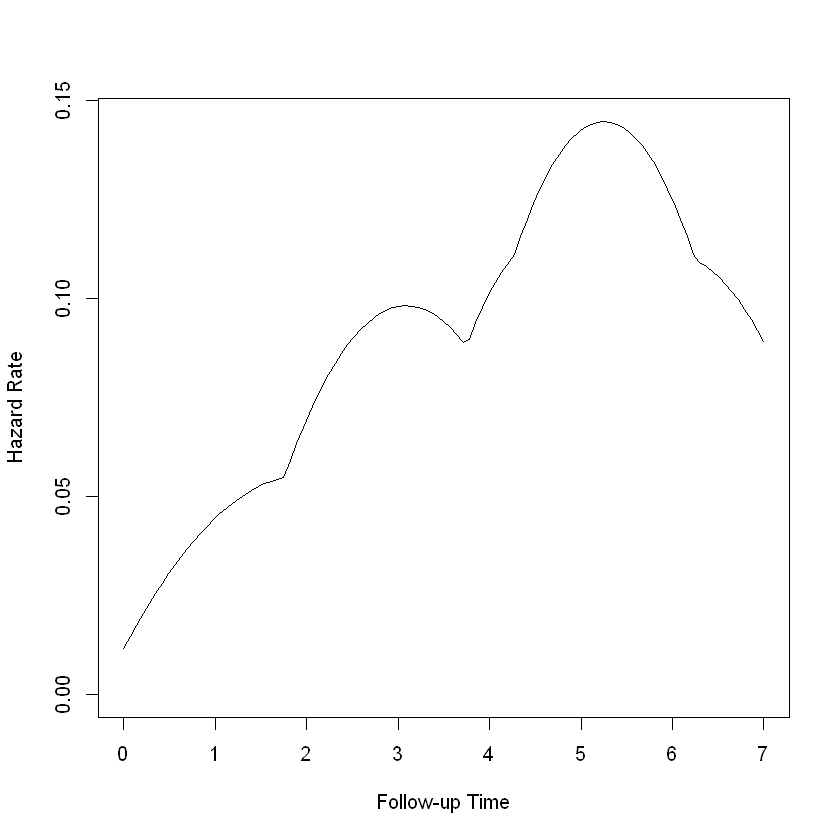

In [95]:
# Table 1.1

t.vec <- c(7,6,6,5,2,4)
cens.vec <- c(0,1,0,0,1,1)

result.simple <- muhaz(t.vec, cens.vec, max.time=8, bw.grid=2.25, 
                       bw.method="global", b.cor="none")
 plot(result.simple)

# muhaz ( a, b, c, d, e, f)
# a: failure times
# b: censoring indicators, 
# c: maximum time, 
# d: smoothing parameter
# e: a constant sommting paraketer is use for all times
# f: "none": no boundary correction

<font size="3"> __Fig. 3.6__ Smoothed and step function estimates of the hazard function for the gastricXelox data


max.time= 20
width= 5
nbins= 4

max.time= 20
width= 1
nbins= 20


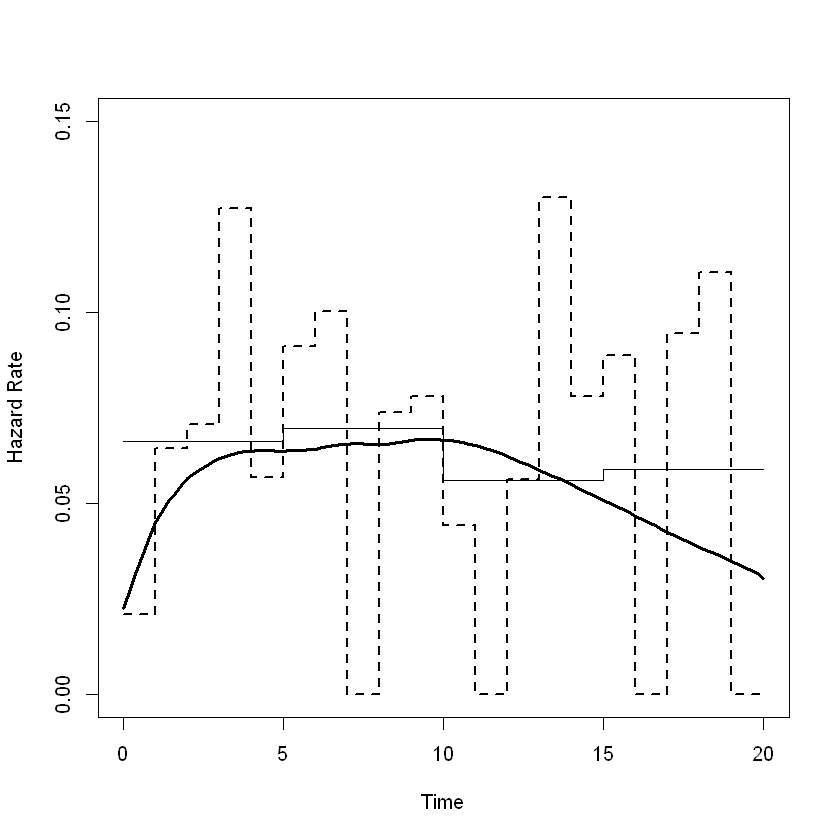

In [119]:
result.pe5 <- pehaz(timeMonths, delta, width=5, max.time=20)
plot(result.pe5, ylim=c(0,0.15), col="black", lwd=1.0)

result.pe1 <- pehaz(timeMonths, delta, width=1, max.time=20)
lines(result.pe1, lty=2, lwd=2.0)

result.smooth <- muhaz(timeMonths, delta, bw.smooth=20,
b.cor="left", max.time=20)
lines(result.smooth, lty=1, lwd=3.0)

<font size="3"> __Fig. 3.7__ Kaplan-Meier and sommthed survival curve estimate for the "gasticXelox" dataset

In [120]:
haz <- result.smooth$haz.est
times <- result.smooth$est.grid
surv <- exp(-cumsum(haz[1:(length(haz)-1)]*diff(times)))

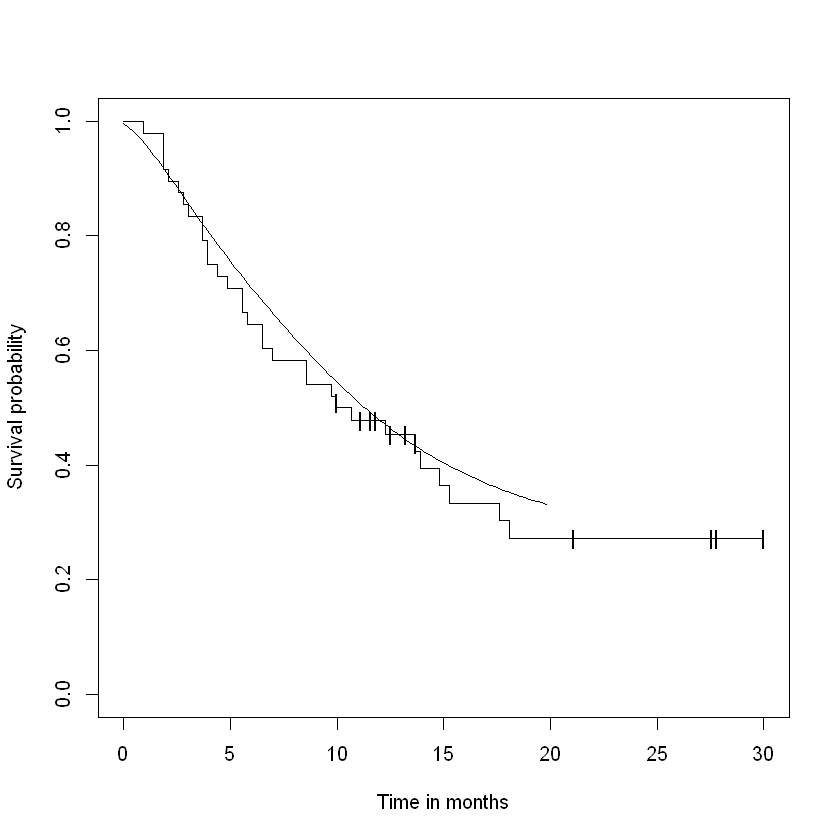

In [121]:
result.km <- survfit(Surv(timeMonths, delta) ~ 1,
conf.type="none")
plot(result.km, conf.int=F, mark="|", xlab="Time in months",
xlim=c(0,30), ylab="Survival probability")
lines(surv ~ times[1:(length(times) - 1)])


## 3.5 Left Truncation

In [122]:
tt <- c(7, 6, 6, 5, 2, 4)
status <- c(0, 1, 0, 0, 1, 1)
backTime <- c(-2, -5, -3, -3, -2, -5)
tm.enter <- -backTime
tm.exit <- tt - backTime
result.left.trunc.km <- survfit(Surv(tm.enter, tm.exit, status, type="counting") ~ 1, 
                                conf.type="none")
summary(result.left.trunc.km)

Call: survfit(formula = Surv(tm.enter, tm.exit, status, type = "counting") ~ 
    1, conf.type = "none")

 time n.risk n.event censored survival std.err
    4      4       1        0    0.750   0.217
    9      4       1        3    0.562   0.230
   11      1       1        0    0.000     NaN

In [131]:
result.left.trunc.naa <- survfit(Surv(tm.enter, tm.exit, status, type="counting") ~ 1, 
                                 type="fleming-harrington", conf.type="none")
summary(result.left.trunc.naa)

# tm.enter: the left truncation
# tm.exit: survival time
# status: event variable

Call: survfit(formula = Surv(tm.enter, tm.exit, status, type = "counting") ~ 
    1, type = "fleming-harrington", conf.type = "none")

 time n.risk n.event censored survival std.err
    4      4       1        0    0.779   0.195
    9      4       1        3    0.607   0.214
   11      1       1        0    0.223   0.237

<font size="3"> __Fig. 3.10__ Estimates of the survival (i.e. age at death) function for men entering the Channing
House. The black curve is the Kaplan-Meier estimate, accounting for age at entry as a left
truncation time, and the blue curve is the corresponding Nelson-Altschuler-Aalen estimator. The
green curve is the Kaplan-Meier estimate, also accounting for left truncation, of the survival
distribution conditional on living to age 68


__Consider the Channing House data.__

In [133]:
head(ChanningHouse)

,sex,entry,exit,time,cens,exitYears,entryYears
,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Male,782,909,127,1,75.75000,65.16667
2,Male,1020,1128,108,1,94.00000,85.00000
3,Male,856,969,113,1,80.75000,71.33333
4,Male,915,957,42,1,79.75000,76.25000
5,Male,863,983,120,1,81.91667,71.91667
6,Male,906,1012,106,1,84.33333,75.50000


In [134]:
ChanningHouse <- within(ChanningHouse, {
                                        entryYears <- entry/12
                                        exitYears <- exit/12})
ChanningMales <- ChanningHouse[ChanningHouse$sex == "Male",]

We estimate the survival diatribution for men using first the Kaplan-Meier estimate and then the Nelson-Altschuer-Aalen estimaor, and plot them. The function in the code “Surv” combines the left truncation time, the death (or censoring) time, and the censoring variable into a single survival variable.

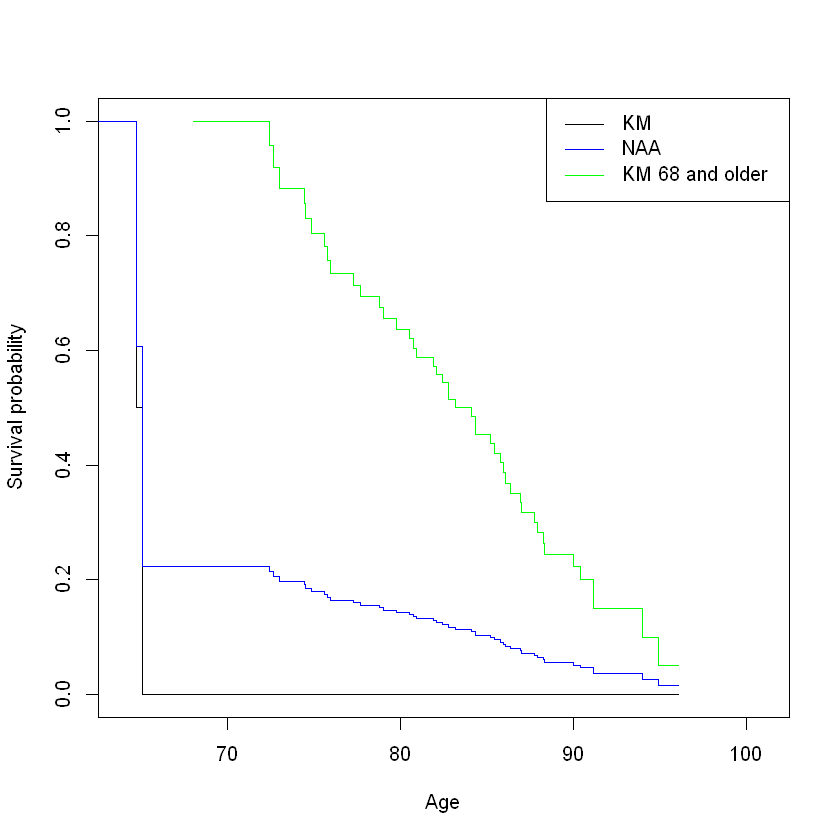

In [137]:
result.km <- survfit(Surv(entryYears, exitYears, cens, type="counting") ~ 1, data=ChanningMales)
plot(result.km, xlim=c(64, 101), ylim=c(0,1), xlab="Age", ylab="Survival probability", conf.int=F)

result.naa <- survfit(Surv(entryYears, exitYears, cens, type="counting") ~ 1, type="fleming-harrington",
data=ChanningMales)
lines(result.naa, col="blue", conf.int=F)

result.km.68 <- survfit(Surv(entryYears, exitYears, cens, type="counting") ~ 1, start.time=68, data=ChanningMales)
lines(result.km.68, col="green", conf.int=F)

legend("topright", legend=c("KM", "NAA", "KM 68 and older"), lty=1, col=c("black", "blue", "green"))